In [1]:
# code taken from https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/, adapted to use LSTM instead of SimpleRNN

In [2]:
n = 9

In [3]:
def zanh(x):
    return 0.006769816 + 0.554670504 * x - 0.009411195 * x**2 - 0.014187547 * x**3

def zanh_int(x, n):
    return  6769816 * 10**(3*n) + 554670504 * x * 10**(2*n) - 9411195 * x**2 * 10**n - 14187547 * x**3

def zigmoid(x):
    return 0.502073021 + 0.198695283 * x - 0.001570683 * x**2 - 0.004001354 * x**3

def zigmoid_int(x, n):
    return 502073021 * 10**(3*n) + 198695283 * x * 10**(2*n) - 1570683 * x**2 * 10**n - 4001354 * x**3

In [4]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
import json

Epoch 1/20


2023-10-14 00:23:14.896420: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


187/187 - 2s - loss: 0.0321 - 2s/epoch - 9ms/step
Epoch 2/20
187/187 - 0s - loss: 0.0172 - 489ms/epoch - 3ms/step
Epoch 3/20
187/187 - 0s - loss: 0.0131 - 481ms/epoch - 3ms/step
Epoch 4/20
187/187 - 0s - loss: 0.0102 - 481ms/epoch - 3ms/step
Epoch 5/20
187/187 - 0s - loss: 0.0080 - 477ms/epoch - 3ms/step
Epoch 6/20
187/187 - 0s - loss: 0.0068 - 483ms/epoch - 3ms/step
Epoch 7/20
187/187 - 0s - loss: 0.0064 - 455ms/epoch - 2ms/step
Epoch 8/20
187/187 - 0s - loss: 0.0063 - 459ms/epoch - 2ms/step
Epoch 9/20
187/187 - 0s - loss: 0.0058 - 454ms/epoch - 2ms/step
Epoch 10/20
187/187 - 0s - loss: 0.0059 - 450ms/epoch - 2ms/step
Epoch 11/20
187/187 - 0s - loss: 0.0058 - 481ms/epoch - 3ms/step
Epoch 12/20
187/187 - 1s - loss: 0.0058 - 504ms/epoch - 3ms/step
Epoch 13/20
187/187 - 0s - loss: 0.0055 - 467ms/epoch - 2ms/step
Epoch 14/20
187/187 - 1s - loss: 0.0053 - 734ms/epoch - 4ms/step
Epoch 15/20
187/187 - 1s - loss: 0.0054 - 523ms/epoch - 3ms/step
Epoch 16/20
187/187 - 1s - loss: 0.0054 - 772ms/

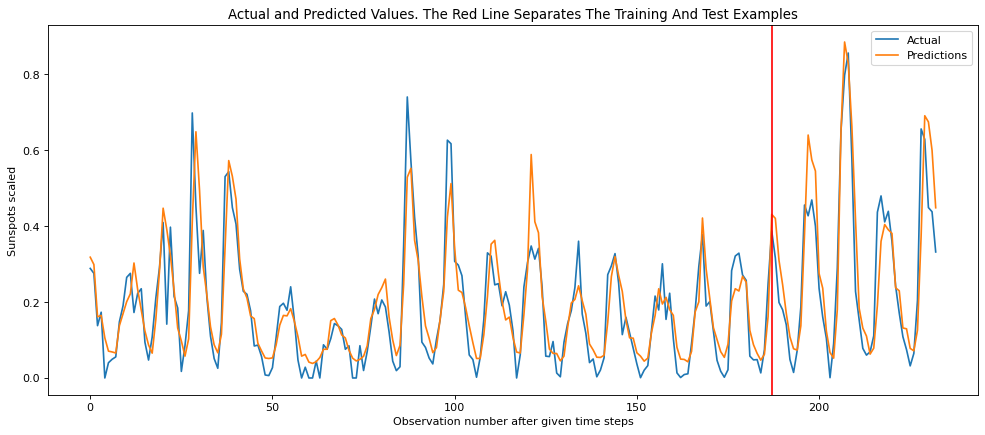

In [5]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape, activation=activation[0], recurrent_activation=activation[1]))
    model.add(Dense(units=dense_units, activation=activation[2]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
time_steps = 12
train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Create model and train
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=[zanh, zigmoid, zanh])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

# Print error
print_error(trainY, testY, train_predict, test_predict)

#Plot result
plot_result(trainY, testY, train_predict, test_predict)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3)                 60        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [7]:
W = (model.get_weights()[0]*float(10**n)).round().astype(int)
U = (model.get_weights()[1]*float(10**n)).round().astype(int)
bh = (model.get_weights()[2]*float(10**(2*n))).round().astype(int)
wy = model.get_weights()[3]
by = model.get_weights()[4]

print('W = ', W, ' U = ', U, ' bh = ', bh, ' wy =', wy, 'by = ', by)

W =  [[ 775362432 -438394592  290805504  177882608 -874510656  287073088
  -920990400 -453769632  273921920  975283072 -596479744  996685696]]  U =  [[-342553472 -313536032 -455266816  -90190792   15536743 -370261952
   726141696  306132352 -289793536 -385216896  320571808 -156189984]
 [ 799359296  660007872  189718816  505495296 1262718976 -161681552
   208826432  243373088  220283328  -99586448  877631424 -316547264]
 [ 358413248 -172512096  700370368  204277664 -378734656  410109088
  -265811776  278003392  741214784  999389248   80779016  386015136]]  bh =  [ 362819561352855552  418396919199432704  201275567788523520
 1335710502361235456 1328248254382473216 1187406174983553024
 -154533198187986944  254994871243243520  133022704889495552
  348538314057318400  383228627468156928  183052674386624512]  wy = [[-0.7160825]
 [-0.6075821]
 [ 1.2159896]] by =  [-0.01934492]


In [8]:
wi = W[:,:3]
wf = W[:,3:6]
wc = W[:,6:9]
wo = W[:,9:]

ui = U[:,:3]
uf = U[:,3:6]
uc = U[:,6:9]
uo = U[:,9:]

bi = bh[:3]
bf = bh[3:6]
bc = bh[6:9]
bo = bh[9:]

print('wi = ', wi, ' ui = ', ui, ' wf = ', wf, ' uf = ', uf, ' wc = ', wc, ' uc = ', uc, ' wo = ', wo, ' uo = ', uo)


wi =  [[ 775362432 -438394592  290805504]]  ui =  [[-342553472 -313536032 -455266816]
 [ 799359296  660007872  189718816]
 [ 358413248 -172512096  700370368]]  wf =  [[ 177882608 -874510656  287073088]]  uf =  [[ -90190792   15536743 -370261952]
 [ 505495296 1262718976 -161681552]
 [ 204277664 -378734656  410109088]]  wc =  [[-920990400 -453769632  273921920]]  uc =  [[ 726141696  306132352 -289793536]
 [ 208826432  243373088  220283328]
 [-265811776  278003392  741214784]]  wo =  [[ 975283072 -596479744  996685696]]  uo =  [[-385216896  320571808 -156189984]
 [ -99586448  877631424 -316547264]
 [ 999389248   80779016  386015136]]


In [9]:
X = (testX[0]*float(10**n)).round().astype(int)
print('X = ', X)

X =  [[522064576]
 [506304160]
 [330575264]
 [430654048]
 [459810816]
 [513396384]
 [571710016]
 [542553152]
 [396769088]
 [492119744]
 [293144192]
 [349881792]]


In [10]:
h = [np.zeros(3).astype(int)]
c = [np.zeros(3).astype(int)]
f_out = []
f_remainder = []
f_zigmoid_out = []
f_zigmoid_remainder = []
i_out = []
i_remainder = []
i_zigmoid_out = []
i_zigmoid_remainder = []
o_out = []
o_remainder = []
o_zigmoid_out = []
o_zigmoid_remainder = []
candidate_out = []
candidate_remainder = []
candidate_zanh_out = []
candidate_zanh_remainder = []
c_out = []
c_remainder = []
c_zanh_out = []
c_zanh_remainder = []
h_out = []
h_remainder = []
for j in range(12):
    f = np.dot(X[j], wf) + np.dot(h[-1],uf) + bf
    of = f // 10**n
    rf = f % 10**n
    f_out.append(of.astype(str).flatten().tolist())
    f_remainder.append(rf.astype(str).flatten().tolist())

    fz = [zigmoid_int(fo, n) for fo in of.astype(int).flatten().tolist()]
    ofz = [zf // 10**(3*n) for zf in fz]
    rfz = [zf % 10**(3*n) for zf in fz]
    ofz = np.array(ofz)
    rfz = np.array(rfz)
    f_zigmoid_out.append(ofz.astype(str).flatten().tolist())
    f_zigmoid_remainder.append(rfz.astype(str).flatten().tolist())

    i = np.dot(X[j], wi) + np.dot(h[-1],ui) + bi
    oi = i // 10**n
    ri = i % 10**n
    i_out.append(oi.astype(str).flatten().tolist())
    i_remainder.append(ri.astype(str).flatten().tolist())

    iz = [zigmoid_int(io, n) for io in oi.astype(int).flatten().tolist()]
    oiz = [zi // 10**(3*n) for zi in iz]
    riz = [zi % 10**(3*n) for zi in iz]
    oiz = np.array(oiz)
    riz = np.array(riz)
    i_zigmoid_out.append(oiz.astype(str).flatten().tolist())
    i_zigmoid_remainder.append(riz.astype(str).flatten().tolist())

    o = np.dot(X[j], wo) + np.dot(h[-1],uo) + bo
    oo = o // 10**n
    ro = o % 10**n
    o_out.append(oo.astype(str).flatten().tolist())
    o_remainder.append(ro.astype(str).flatten().tolist())

    oz = [zigmoid_int(ooo, n) for ooo in oo.astype(int).flatten().tolist()]
    ooz = [zo // 10**(3*n) for zo in oz]
    roz = [zo % 10**(3*n) for zo in oz]
    ooz = np.array(ooz)
    roz = np.array(roz)
    o_zigmoid_out.append(ooz.astype(str).flatten().tolist())
    o_zigmoid_remainder.append(roz.astype(str).flatten().tolist())

    candidate = np.dot(X[j], wc) + np.dot(h[-1],uc) + bc
    oca = candidate // 10**n
    rca = candidate % 10**n
    candidate_out.append(oca.astype(str).flatten().tolist())
    candidate_remainder.append(rca.astype(str).flatten().tolist())

    caz = [zanh_int(co, n) for co in oca.astype(int).flatten().tolist()]
    ocaz = [ca // 10**(3*n) for ca in caz]
    rcaz = [ca % 10**(3*n) for ca in caz]
    ocaz = np.array(ocaz)
    rcaz = np.array(rcaz)
    candidate_zanh_out.append(ocaz.astype(str).flatten().tolist())
    candidate_zanh_remainder.append(rcaz.astype(str).flatten().tolist())

    # print("f = ", of, " i = ", oi, " o = ", oo, " candidate = ", oca)

    C = np.multiply(ofz, c[-1]) + np.multiply(oiz, ocaz)
    oc = C // 10**n
    rc = C % 10**n

    c.append(oc)
    c_out.append(oc.astype(str).flatten().tolist())
    c_remainder.append(rc.astype(str).flatten().tolist())

    cz = [zanh_int(co, n) for co in oc.astype(int).flatten().tolist()]
    ocz = [cz // 10**(3*n) for cz in cz]
    rcz = [cz % 10**(3*n) for cz in cz]
    ocz = np.array(ocz)
    rcz = np.array(rcz)
    c_zanh_out.append(ocz.astype(str).flatten().tolist())
    c_zanh_remainder.append(rcz.astype(str).flatten().tolist())

    H = np.multiply(ooz, ocz)
    oh = H // 10**n
    rh = H % 10**n

    print("C = ", C, " H = ", H)
    
    h.append(oh)
    h_out.append(oh.astype(str).flatten().tolist())
    h_remainder.append(rh.astype(str).flatten().tolist())
    print('oc = ', oc, ' oh = ', oh, ' rc = ', rc, ' rh = ', rh)

with open('f_out.json', 'w') as f:
    json.dump(f_out , f)

with open('f_remainder.json', 'w') as f:
    json.dump(f_remainder , f)

with open('f_zigmoid_out.json', 'w') as f:
    json.dump(f_zigmoid_out , f)

with open('f_zigmoid_remainder.json', 'w') as f:
    json.dump(f_zigmoid_remainder , f)

with open('i_out.json', 'w') as f:
    json.dump(i_out , f)

with open('i_remainder.json', 'w') as f:
    json.dump(i_remainder , f)

with open('i_zigmoid_out.json', 'w') as f:
    json.dump(i_zigmoid_out , f)

with open('i_zigmoid_remainder.json', 'w') as f:
    json.dump(i_zigmoid_remainder , f)

with open('o_out.json', 'w') as f:
    json.dump(o_out , f)

with open('o_remainder.json', 'w') as f:
    json.dump(o_remainder , f)

with open('o_zigmoid_out.json', 'w') as f:
    json.dump(o_zigmoid_out , f)

with open('o_zigmoid_remainder.json', 'w') as f:
    json.dump(o_zigmoid_remainder , f)

with open('candidate_out.json', 'w') as f:
    json.dump(candidate_out , f)

with open('candidate_remainder.json', 'w') as f:
    json.dump(candidate_remainder , f)

with open('candidate_zanh_out.json', 'w') as f:
    json.dump(candidate_zanh_out , f)

with open('candidate_zanh_remainder.json', 'w') as f:
    json.dump(candidate_zanh_remainder , f)

with open('c_out.json', 'w') as f:
    json.dump(c_out , f)

with open('c_remainder.json', 'w') as f:
    json.dump(c_remainder , f)

with open('c_zanh_out.json', 'w') as f:
    json.dump(c_zanh_out , f)

with open('c_zanh_remainder.json', 'w') as f:
    json.dump(c_zanh_remainder , f)

with open('h_out.json', 'w') as f:
    json.dump(h_out , f)

with open('h_remainder.json', 'w') as f:
    json.dump(h_remainder , f)

C =  [-225412638278471075    9068761739902208   90844871047533000]  H =  [-79304988147756712   6092345534271480  36505881365655910]
oc =  [-225412639    9068761   90844871]  oh =  [-79304989   6092345  36505881]  rc =  [721528925 739902208  47533000]  rh =  [852243288 534271480 365655910]
C =  [-420524995351799319   13605019114665281  176855274976084525]  H =  [-154045325961450620    7369053222031989   67016524322543532]
oc =  [-420524996   13605019  176855274]  oh =  [-154045326    7369053   67016524]  rc =  [648200681 114665281 976084525]  rh =  [ 38549380 222031989 322543532]
C =  [-528175574376926331   37792520301682551  241110599695059507]  H =  [-188472486223091336   14733242342676092   85557648440353480]
oc =  [-528175575   37792520  241110599]  oh =  [-188472487   14733242   85557648]  rc =  [623073669 301682551 695059507]  rh =  [776908664 342676092 440353480]
C =  [-663431226988001700   38650652075081781  311111014176104785]  H =  [-246128676830467200   14635205684028000  112

In [11]:
y = model.predict(testX[[0]])
o12 = zanh(np.dot(h[-1]/float(10**n), wy) + by)
print(y, o12)

1/1 [==============================] - 0s 18ms/step
[[0.4313251]] [0.43132489]


In [12]:
# quantization
params_json = {
    'wi': wi.round().astype(int).astype(str).flatten().tolist(),
    'wf': wf.round().astype(int).astype(str).flatten().tolist(),
    'wc': wc.round().astype(int).astype(str).flatten().tolist(),
    'wo': wo.round().astype(int).astype(str).flatten().tolist(),
    'ui': ui.round().astype(int).astype(str).flatten().tolist(),
    'uf': uf.round().astype(int).astype(str).flatten().tolist(),
    'uc': uc.round().astype(int).astype(str).flatten().tolist(),
    'uo': uo.round().astype(int).astype(str).flatten().tolist(),
    'bi': bi.round().astype(int).astype(str).flatten().tolist(),
    'bf': bf.round().astype(int).astype(str).flatten().tolist(),
    'bc': bc.round().astype(int).astype(str).flatten().tolist(),
    'bo': bo.round().astype(int).astype(str).flatten().tolist(),
}

In [13]:
with open('params.json', 'w') as f:
    json.dump(params_json, f)

In [14]:
with open("in.json", "w") as f:
    json.dump(X.round().astype(int).astype(str).flatten().tolist(), f)

In [15]:
# convert oh and oc to hex
for i in range(3):
    print(hex(oh[i]))

for i in range(3):
    print(hex(oc[i]))

-0x23624bf6
0x397731
0x12dfaf19
-0x5aef77cb
0x12c240
0x35f22b9f
